# IMPORT RELEVANT MODULES

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

2022-11-11 01:35:29.057250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# LOAD THE DATASET

In [2]:
# Import the dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label
training_df["median_house_value"] /= 1000.0
# Scaling median_house_value puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


# EXAMINE THE DATASET

In [3]:
# Get statistics on the dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


# ## Task 1: Examine the Data
# Do you see any anomalies (strange values) in the data?
# My answer:
# Yes: total_rooms and total_bedrooms have max values to high compared to the quartiles.

# Possible answer:
# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

# DEFINE FUNCTIONS THAT BUILD AND TRAIN A MODEL

In [4]:

def build_model(my_learning_rate):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, df, feature, label, epochs, batch_size):
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")


Defined the build_model and train_model functions.


# DEFINE PLATTING FUNCTIONS

In [6]:
def plot_the_model(trained_weight, trained_bias, feature, label):

    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).

    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


# CALL THE MODEL FUNCTIONS

2022-11-11 02:10:09.856015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 02:10:09.859198: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
567/567 [==============================] - 2s 3ms/step - loss: 132166.4062 - root_mean_squared_error: 363.5470
Epoch 2/30
567/567 [==============================] - 1s 2ms/step - loss: 27759.1875 - root_mean_squared_error: 166.6109
Epoch 3/30
567/567 [==============================] - 1s 2ms/step - loss: 26988.6211 - root_mean_squared_error: 164.2821
Epoch 4/30
567/567 [==============================] - 1s 2ms/step - loss: 26437.0410 - root_mean_squared_error: 162.5947
Epoch 5/30
567/567 [==============================] - 2s 4ms/step - loss: 25693.1309 - root_mean_squared_error: 160.2908
Epoch 6/30
567/567 [==============================] - 2s 3ms/step - loss: 24987.4453 - root_mean_squared_error: 158.0742
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24317.3340 - root_mean_squared_error: 155.9402
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 23851.3066 - root_mean_squared_error: 154.4387
Epoch 9/30
567/567 [===========

/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


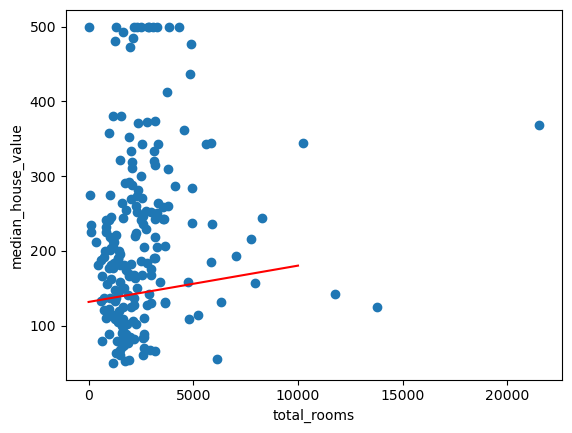

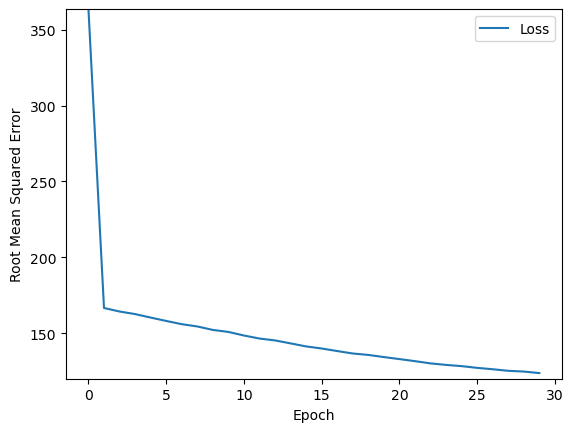

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature="total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# USE THE MODEL TO MAKE PREDICTIONS

In [9]:
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000+n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print("%5.0f %6.0f %15.0f" % (training_df[feature][10000+i],
                                      training_df[label][10000+i],
                                      predicted_values[i][0]))

In [10]:
# Invoke the house prediction function on 10 examples.
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             141
 3400     92             148
 3677     69             150
 2202     62             142
 2403     80             143
 5652    295             159
 3318    500             148
 2552    342             144
 1364    118             138
 3468    128             149


# TASK 2: JUDGE THE PREDICTIVE POWER OF THE MODEL

In [ ]:
# Look at the preceding table. How close is the predicted value to the label value? In other words, does your model accurately predict house values?

# My answer: the predicted value is not very close to the label value. The model is not very accurate.
# Google answer: Most of the predicted values differ significantly from the label value, so the trained model probably doesn't have much predictive power. However, the first 10 examples might not be representative of the rest of the examples.

# TASK 3: TRY A DIFFERENT FEATURE

Epoch 1/3
142/142 [==============================] - 1s 2ms/step - loss: 3672446.0000 - root_mean_squared_error: 1916.3627
Epoch 2/3
142/142 [==============================] - 0s 2ms/step - loss: 3304547.5000 - root_mean_squared_error: 1817.8414
Epoch 3/3
142/142 [==============================] - 0s 2ms/step - loss: 3121556.2500 - root_mean_squared_error: 1766.7926


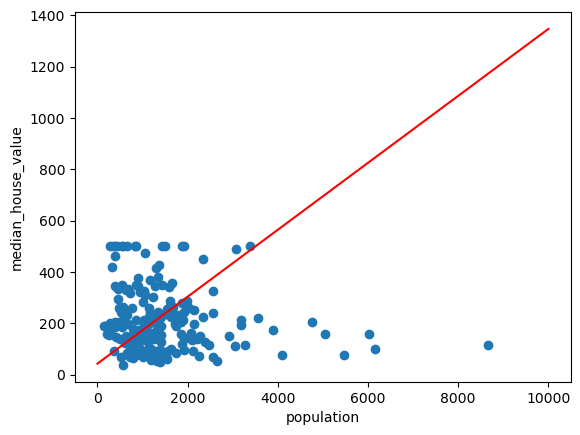

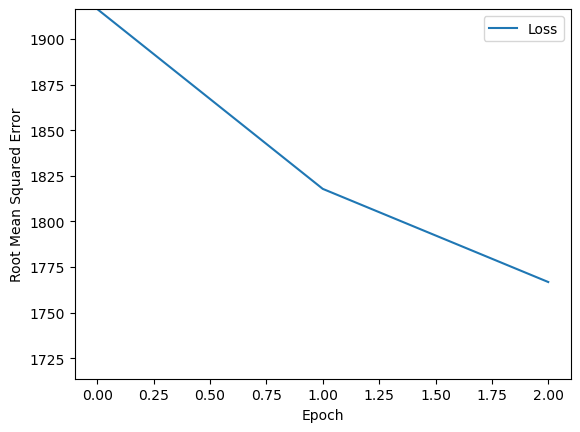

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             210
 1867     92             286
 2191     69             328
 1052     62             180
 1647     80             257
 2312    295             344
 1604    500             252
 1066    342             182
  338    118              87
 1604    128             252
 1200    187             199
  292     80              81
 2014    112             305
 1817     95             280
 1328     69             216


In [12]:
my_feature = "population"  # the total number of people on a specific city block.

# Experiment with the following hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything else.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Invoke the house prediction function on 15 examples.
predict_house_values(15, my_feature, my_label)

Epoch 1/18


/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5667/5667 [==============================] - 56s 10ms/step - loss: 28898.9355 - root_mean_squared_error: 169.9969
Epoch 2/18
5667/5667 [==============================] - 49s 9ms/step - loss: 19989.6250 - root_mean_squared_error: 141.3847
Epoch 3/18
5667/5667 [==============================] - 46s 8ms/step - loss: 18380.8477 - root_mean_squared_error: 135.5760
Epoch 4/18
5667/5667 [==============================] - 45s 8ms/step - loss: 18520.1465 - root_mean_squared_error: 136.0887
Epoch 5/18
5667/5667 [==============================] - 53s 9ms/step - loss: 17860.5625 - root_mean_squared_error: 133.6434
Epoch 6/18
5667/5667 [==============================] - 45s 8ms/step - loss: 18276.1816 - root_mean_squared_error: 135.1894
Epoch 7/18
5667/5667 [==============================] - 42s 7ms/step - loss: 17982.0859 - root_mean_squared_error: 134.0973
Epoch 8/18
5667/5667 [==============================] - 48s 8ms/step - loss: 18846.6992 - root_mean_squared_error: 137.2833
Epoch 9/18
5667/56

/home/leilenkalbermatter/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


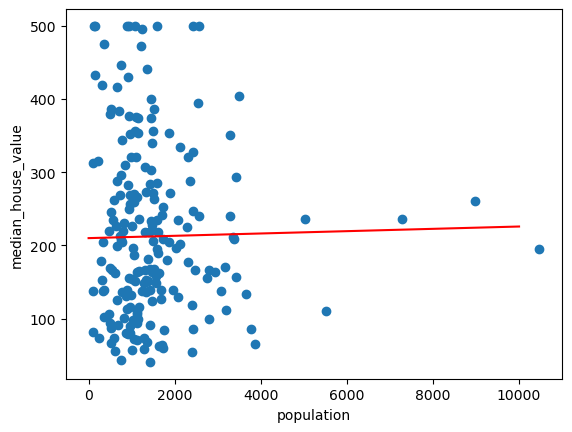

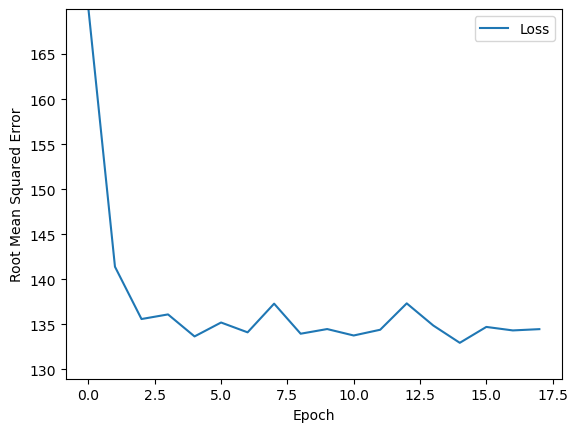

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             212
 1867     92             213
 2191     69             214
 1052     62             212
 1647     80             213
 2312    295             214
 1604    500             213
 1066    342             212
  338    118             211
 1604    128             213


In [13]:
# possible solution

my_feature = "population"  # the total number of people on a specific city block.

# Experiment with the following hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything else.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Invoke the house prediction function on 10 examples.
predict_house_values(10, my_feature, my_label)

# Did population produce better predictions than total_rooms?
# My answer: No, the predictions are not better than total_rooms. In fact, the predictions are worse. The model with total_rooms as the feature has a lower loss than the model with population as the feature. The model with total_rooms as the feature is a better model.

# Google Answer:
# Training is not entirely deterministic, but population
# typically converges at a slightly higher RMSE than
# total_rooms.  So, population appears to be about
# the same or slightly worse at making predictions
# than total_rooms.

# TASK 4: DEFINE A SYNTHETIC FEATURE

Epoch 1/24
567/567 [==============================] - 2s 2ms/step - loss: 38043.1680 - root_mean_squared_error: 195.0466
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 19000.7578 - root_mean_squared_error: 137.8432
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 15171.2139 - root_mean_squared_error: 123.1715
Epoch 4/24
567/567 [==============================] - 1s 2ms/step - loss: 14829.8145 - root_mean_squared_error: 121.7777
Epoch 5/24
567/567 [==============================] - 1s 2ms/step - loss: 14652.8193 - root_mean_squared_error: 121.0488
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 14505.1875 - root_mean_squared_error: 120.4375
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 14296.9424 - root_mean_squared_error: 119.5698
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 14129.6846 - root_mean_squared_error: 118.8683
Epoch 9/24
567/567 [============

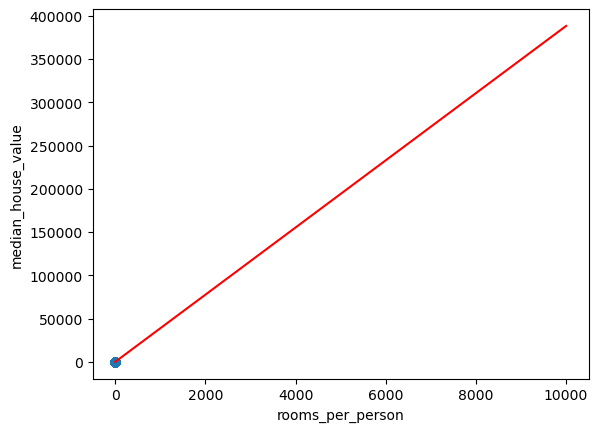

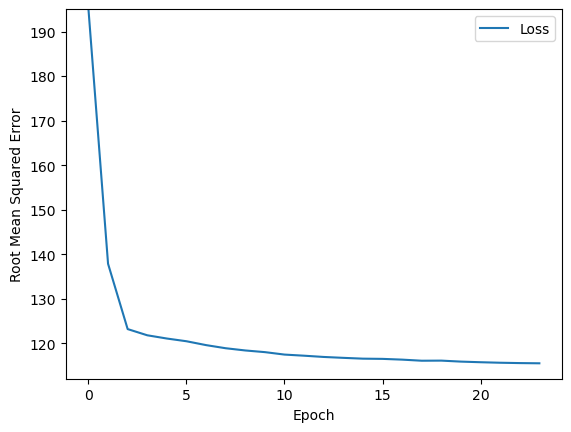

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             190
    2     92             201
    2     69             196
    2     62             212
    1     80             187
    2    295             225
    2    500             211
    2    342             224
    4    118             287
    2    128             215
    2    187             224
    3     80             235
    2    112             225
    2     95             220
    2     69             211


In [15]:
# Create a synthetic feature.
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything else.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Invoke the house prediction function on 15 examples.
predict_house_values(15, my_feature, my_label)

# Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.

# TASK 5: FIND FEATURES WHOSE RAW VALUES CORRELATE WITH THE LABEL

In [16]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


# The correlation matrix shows nine potential features (including a synthetic feature) and one label (median_house_value). A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.

# Your Task: Determine which of the nine potential features appears to be the best candidate for a feature?
# My answer: The best candidate for a feature is median_income. It has the strongest positive correlation with the label.


Epoch 1/300
85/85 [==============================] - 1s 2ms/step - loss: 54559.0273 - root_mean_squared_error: 233.5787
Epoch 2/300
85/85 [==============================] - 0s 2ms/step - loss: 51397.9727 - root_mean_squared_error: 226.7112
Epoch 3/300
85/85 [==============================] - 0s 2ms/step - loss: 48400.8828 - root_mean_squared_error: 220.0020
Epoch 4/300
85/85 [==============================] - 0s 2ms/step - loss: 45542.9844 - root_mean_squared_error: 213.4080
Epoch 5/300
85/85 [==============================] - 0s 2ms/step - loss: 42804.3359 - root_mean_squared_error: 206.8921
Epoch 6/300
85/85 [==============================] - 0s 2ms/step - loss: 40201.4648 - root_mean_squared_error: 200.5031
Epoch 7/300
85/85 [==============================] - 0s 1ms/step - loss: 37735.3594 - root_mean_squared_error: 194.2559
Epoch 8/300
85/85 [==============================] - 0s 1ms/step - loss: 35411.4570 - root_mean_squared_error: 188.1793
Epoch 9/300
85/85 [=====================

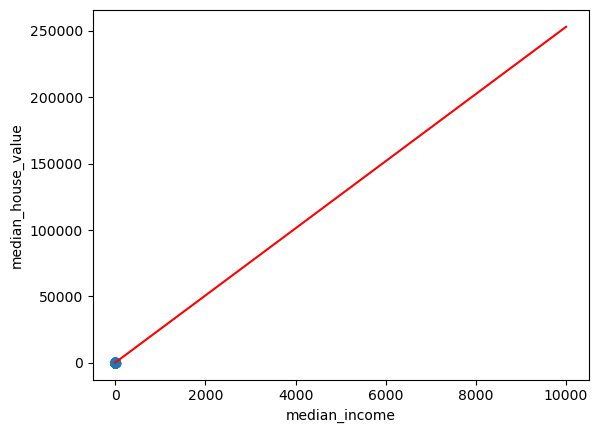

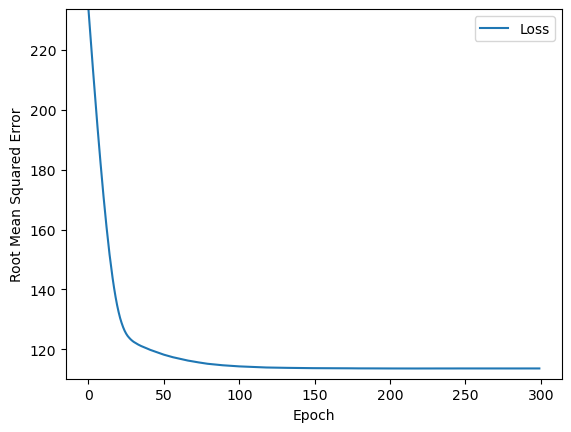

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             196
    2     92             203
    2     69             200
    2     62             210
    1     80             194
    2    295             219
    2    500             210
    2    342             218
    4    118             259
    2    128             212
    2    187             218
    3     80             225
    2    112             219
    2     95             215
    2     69             210
    2     90             217
    2     54             213
    2     68             216
    2     71             206
    2     73             214
    2     58             207
    2     51             195
    1     52             187
    1     47             184
    1     50             183
    2     90             197
    1     34             174
    2     45             198
    2    126             201
    1     67    

2022-11-11 05:04:35.068500: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


In [31]:
# Create a synthetic feature.
training_df["median_income"] = training_df["total_rooms"] / training_df["population"]
my_feature = "median_income"

# Tune the hyperparameters.
learning_rate = 0.03 # learning rate definition: the rate at which the model learns
epochs = 300 # epochs definition: the number of times the model will run through the training data
batch_size = 200 # batch_size definition: the number of examples the model will see before it updates its weights

# Don't change anything else.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Invoke the house prediction function on 15 examples.
predict_house_values(100, my_feature, my_label)

# Pending: The model is not creating great predictions. The loss is still high. The predictions are not very close to the label values. The model is not very accurate.